<a href="https://colab.research.google.com/github/AndrewAmkreutz/DS5006-Machine-Learning-for-Engineering-and-Science-Applications/blob/main/My_CaseStudy_2_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lithium-ion Batteries

This case study is based upon the excellent example below:

https://apmonitor.com/pds/index.php/Main/LithiumIonBatteries

Along with its github repository:

https://github.com/APMonitor/pds

and license:

https://github.com/APMonitor/pds/blob/main/LICENSE

In particular, as described on the web page above:

Physical and chemical properties of the Lithium-ion silicate cathodes are used to predict the crystal structure of a Lithium-ion battery material as monoclinic, orthorhombic and triclinic. This case study demonstrates how feature engineering improves the classification results.

![](http://cdn.pixabay.com/photo/2020/01/28/15/18/battery-4800010_960_720.jpg)

**Background:** [Lithium-ion batteries](https://en.wikipedia.org/wiki/Lithium-ion_battery) are commonly used for portable electronics, electric vehicles, and aerospace applications. During discharge, Lithium ions move from the negative electrode through an electrolyte to the positive electrode to create a voltage and current. During recharging, the ions migrate back to the negative electrode. The crystal structure (monoclinic, orthorhombic, triclinic) is available for 339 different chemicals that contain lithium. Available properties are:

| Label | Description |
|------|------|
|   Materials Id  | Unique ID of the material from materialsproject.org |
|   Formula  | Chemical formula of the compound |
|   Space group  | Symmetry group of a three-dimensional crystal pattern |
|   Formation Energy (eV)  | Energy required to produce the material from standard elements |
|   E Above Hull (eV)  | Energy released if compound is decomposed into the most stable compounds |
|   Band Gap (eV)  | Energy range in a solid where no electronic states can exist. A larger band gap indicates that the compound is worse at conducting electricity or heat. |
|   Nsites  | Number of atoms in the unit cell of the crystal |
|   Density (gm/cc)  | Mass per volume of bulk crystalline materials |
|   Volume  | Unit cell volume of the material |
|   Has Bandstructure  | Boolean (True / False) variable for bandstructure |

**Objective:** Predict the crystal structure type (monoclinic, orthorhombic, triclinic) from Lithium-ion physical and chemical compound information.


**References**

Hedengren, J. D. (2021, December 16). Lithium-ion Batteries, Machine Learning for Engineers. Retrieved from https://apmonitor.com/pds/index.php/Main/LithiumIonBatteries

### Import Polymer MFR Data


In [1]:
# install package
# using for variable encoding

try:
    import chemparse
except:
    !pip install chemparse
    print('May need to restart kernel to use chemparse')

May need to restart kernel to use chemparse


Similar to case study 1, the data can be accessed directly by url.

In [2]:
import pandas as pd
url = 'http://apmonitor.com/pds/uploads/Main/lithium_ion.txt'
data = pd.read_csv(url)
data.sample(20)

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
10,mp-782667,Li2MnSiO4,P21/c,-2.660,0.044,2.785,32,2.977,358.984,True,monoclinic
2,mp-761311,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic
16,mp-850142,Li2Mn(Si2O5)2,P21/c,-2.942,0.069,3.823,68,2.310,980.879,False,monoclinic
154,mp-761523,Li2Mn2(Si2O5)3,Cmce,-2.950,0.055,3.376,100,2.634,1342.122,False,orthorhombic
199,mp-766989,LiFe(Si2O5)2,Pnc2,-2.952,0.043,3.053,32,2.798,397.806,True,orthorhombic
29,mp-761765,Li3Mn3SiO8,P2/m,-2.329,0.088,0.915,15,3.853,147.276,True,monoclinic
37,mp-19061,LiFe(SiO3)2,P21/c,-2.820,0.001,2.755,40,3.309,431.516,True,monoclinic
38,mp-646320,Li2FeSiO4,P21/c,-2.625,0.001,3.443,32,3.067,350.466,False,monoclinic
296,mp-761820,LiFeSi3O8,P1,-2.886,0.041,3.160,26,2.703,337.873,True,triclinic
201,mp-773415,Li2Fe2(Si2O5)3,Cmce,-2.904,0.050,3.152,100,2.651,1338.234,False,orthorhombic


Still remember the ValueError we met in Case Study 1? Because we forgot to

---

check if there are any null values in the dataset.

This time, let's do check that first.

![](https://i.pinimg.com/originals/05/ba/0a/05ba0af7235165ec94078d0d6661047f.jpg)

**Recall:**

`data.isnull()` is used to check if there is null value in the dataset. We can sum them by using `sum()`.

`data.info()` and `data.describe()` are usually used to check the properties and basic statistics of the data.

In [3]:
data.isnull().sum().sum()

np.int64(0)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Materials Id           339 non-null    object 
 1   Formula                339 non-null    object 
 2   Spacegroup             339 non-null    object 
 3   Formation Energy (eV)  339 non-null    float64
 4   E Above Hull (eV)      339 non-null    float64
 5   Band Gap (eV)          339 non-null    float64
 6   Nsites                 339 non-null    int64  
 7   Density (gm/cc)        339 non-null    float64
 8   Volume                 339 non-null    float64
 9   Has Bandstructure      339 non-null    bool   
 10  Crystal System         339 non-null    object 
dtypes: bool(1), float64(5), int64(1), object(4)
memory usage: 26.9+ KB


In [5]:
data.describe()

,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000
mean,-2.616950,0.058215,2.079740,38.837758,2.984003,467.765619
std,0.183809,0.030363,1.087968,23.133142,0.353968,292.674559
min,-2.985000,0.000000,0.000000,10.000000,2.200000,122.581000
25%,-2.757500,0.035500,1.265500,26.000000,2.760500,286.381500
50%,-2.605000,0.062000,2.499000,31.000000,2.947000,358.537000
75%,-2.525500,0.081500,2.968000,52.000000,3.106000,601.696500
max,-2.012000,0.190000,3.823000,132.000000,4.201000,1518.850000


Great!!! This dataset does not contain any null values. 🙂 Let's start modeling.

# Naive solution

### Classification Modeling
What is the first step? Splitting the training and test set right?

**Recall:**
The `train_test_split` is a function in `sklearn` for the specific purpose of splitting data into train and test sets.

In [6]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data, test_size=0.2, shuffle=True, random_state=1)

Not sure which column could be a useful feature? Let's start with the naive solution use them all first, except for `Materials Id`, since `Materials Id` is not important in this case.

> Add blockquote



**Features：**Formula	Spacegroup, Formation Energy (eV), 	E Above Hull (eV), 	Band Gap (eV), 	Nsites, 	Density (gm/cc), 	Volume, 	Has Bandstructure

**label：** Crystal System

In [7]:
from sklearn.tree import DecisionTreeClassifier
method = DecisionTreeClassifier()

In [8]:
model = method.fit(train[['Formula', 'Spacegroup', 'Formation Energy (eV)', 'E Above Hull (eV)', 'Band Gap (eV)', 'Nsites', 'Density (gm/cc)', 'Volume', 'Has Bandstructure']].to_numpy(),train['Crystal System'].to_numpy())

ValueError: could not convert string to float: 'Li4Fe2SiO7'

ValueError: could not convert string to float: 'Li4Fe2SiO7'????

![?](https://www.mememaker.net/static/images/memes/4379873.jpg)

What is 'Li4Fe2SiO7'? It looks like a Formula. Why we neet to convert it to float?

Wow! Our model can not handle the string information directly, so we need to convert it to value. Let's check their data type first.


`dtypes` is used to check data's type.

In [9]:
data.dtypes

,0
Materials Id,object
Formula,object
Spacegroup,object
Formation Energy (eV),float64
E Above Hull (eV),float64
Band Gap (eV),float64
Nsites,int64
Density (gm/cc),float64
Volume,float64
Has Bandstructure,bool


It turns out that we need to distinguish the types of variables first. 👀

## **Question 1** **(15 points)**

**Part 1 (5 points)**

What is the differnce between interval (also called numerical), ordinal and categorical variables?

__Answer__:

Interval    - These measure a quantity which can be described numerically. Adidianally the interval vetween data points remain consistant (such as temperature)

Ordinal     - These variables classify data that fits into distinct categories. There is a higherarchy in these types of variables (Bachelor's, Master's, Ph.D. for example)

Categorical - Categorical variables represent quantities that can't be measuredd with numbers and have no higherarchy (or order) associated with them (red, green, blue for example)

**Part 2 (5 points)**  

Why does it matter whether a variable is categorical, ordinal or interval? Give an example.

__Answer__: The type of variable determines how we should interpret the data. If Interval data in placed we should ensure the distance from the lowest value to the highest is not the same as the 2nd highest to the highest value. I.e temperature, 70 F and 71 F are 1 distance away where as 32 F and 71 F is more that 1 away. If the data is categorical, perhaps a seperate way of determining distance is needed as red might be different distance from blue than blue is from green. Similarly with ordinal data. Aditionally, this is important as only eumerical (interval) data can have statistical operations, such as mean and standard diviation, performed on them.

**Part 3 (5 points)**  

Identify the data type of the following variables in the dataset.

`Materials Id`              
`Formula`                  
`Spacegroup`                
`Formation Energy (eV)`    
`E Above Hull (eV)`        
`Band Gap (eV)`            
`Nsites`                     
`Density (gm/cc)`          
`Volume`                   
`Has Bandstructure`           
`Crystal System`            

Hint:
Review Randy's 🧙 class notes that can be found from Canvas.

__Answer__:

`Materials Id:          object`              
`Formula:               object`                  
`Spacegroup:            object`                
`Formation Energy (eV): float64`    
`E Above Hull (eV):     float64`        
`Band Gap (eV):         float64`            
`Nsites:                int64`                     
`Density (gm/cc):       float64`          
`Volume:                float64`                   
`Has Bandstructure:     bool`           
`Crystal System:        object`

In [ ]:
# PROVDE ANY CODE NEEDED FOR QUESTION 1 HERE

### Let's seperate the numeric columns from the categorical columns and explore some intial relationships first

In [10]:
# Separate into numerical features that don't need preprocessing, and categorical features that need to be transformed
num_feat = data.select_dtypes(include=['int64','float64']).columns
cat_feat = data.select_dtypes(include=['object','bool']).columns

In [11]:
num_feat

Index(['Formation Energy (eV)', 'E Above Hull (eV)', 'Band Gap (eV)', 'Nsites',
       'Density (gm/cc)', 'Volume'],
      dtype='object')

In [12]:
cat_feat

Index(['Materials Id', 'Formula', 'Spacegroup', 'Has Bandstructure',
       'Crystal System'],
      dtype='object')

Still remember how to use heatmap and pair plot to show the correlation between variables? Let's discover the correlation of all numerical variables.

**Recall:**

`sns.heatmap(cor, annot=True,cmap=plt.cm.Reds)`

`sns.pairplot(data)`




In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

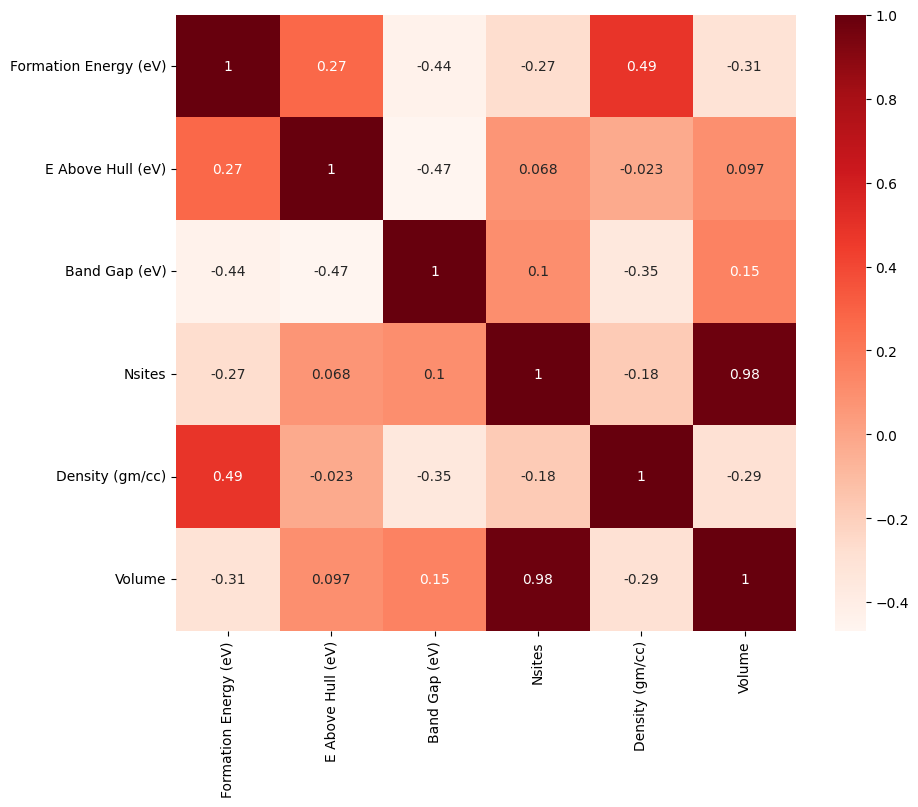

In [14]:
plt.figure(figsize=(10,8))
cor = data[num_feat].corr()
sns.heatmap(cor, annot=True,cmap=plt.cm.Reds)
plt.show()

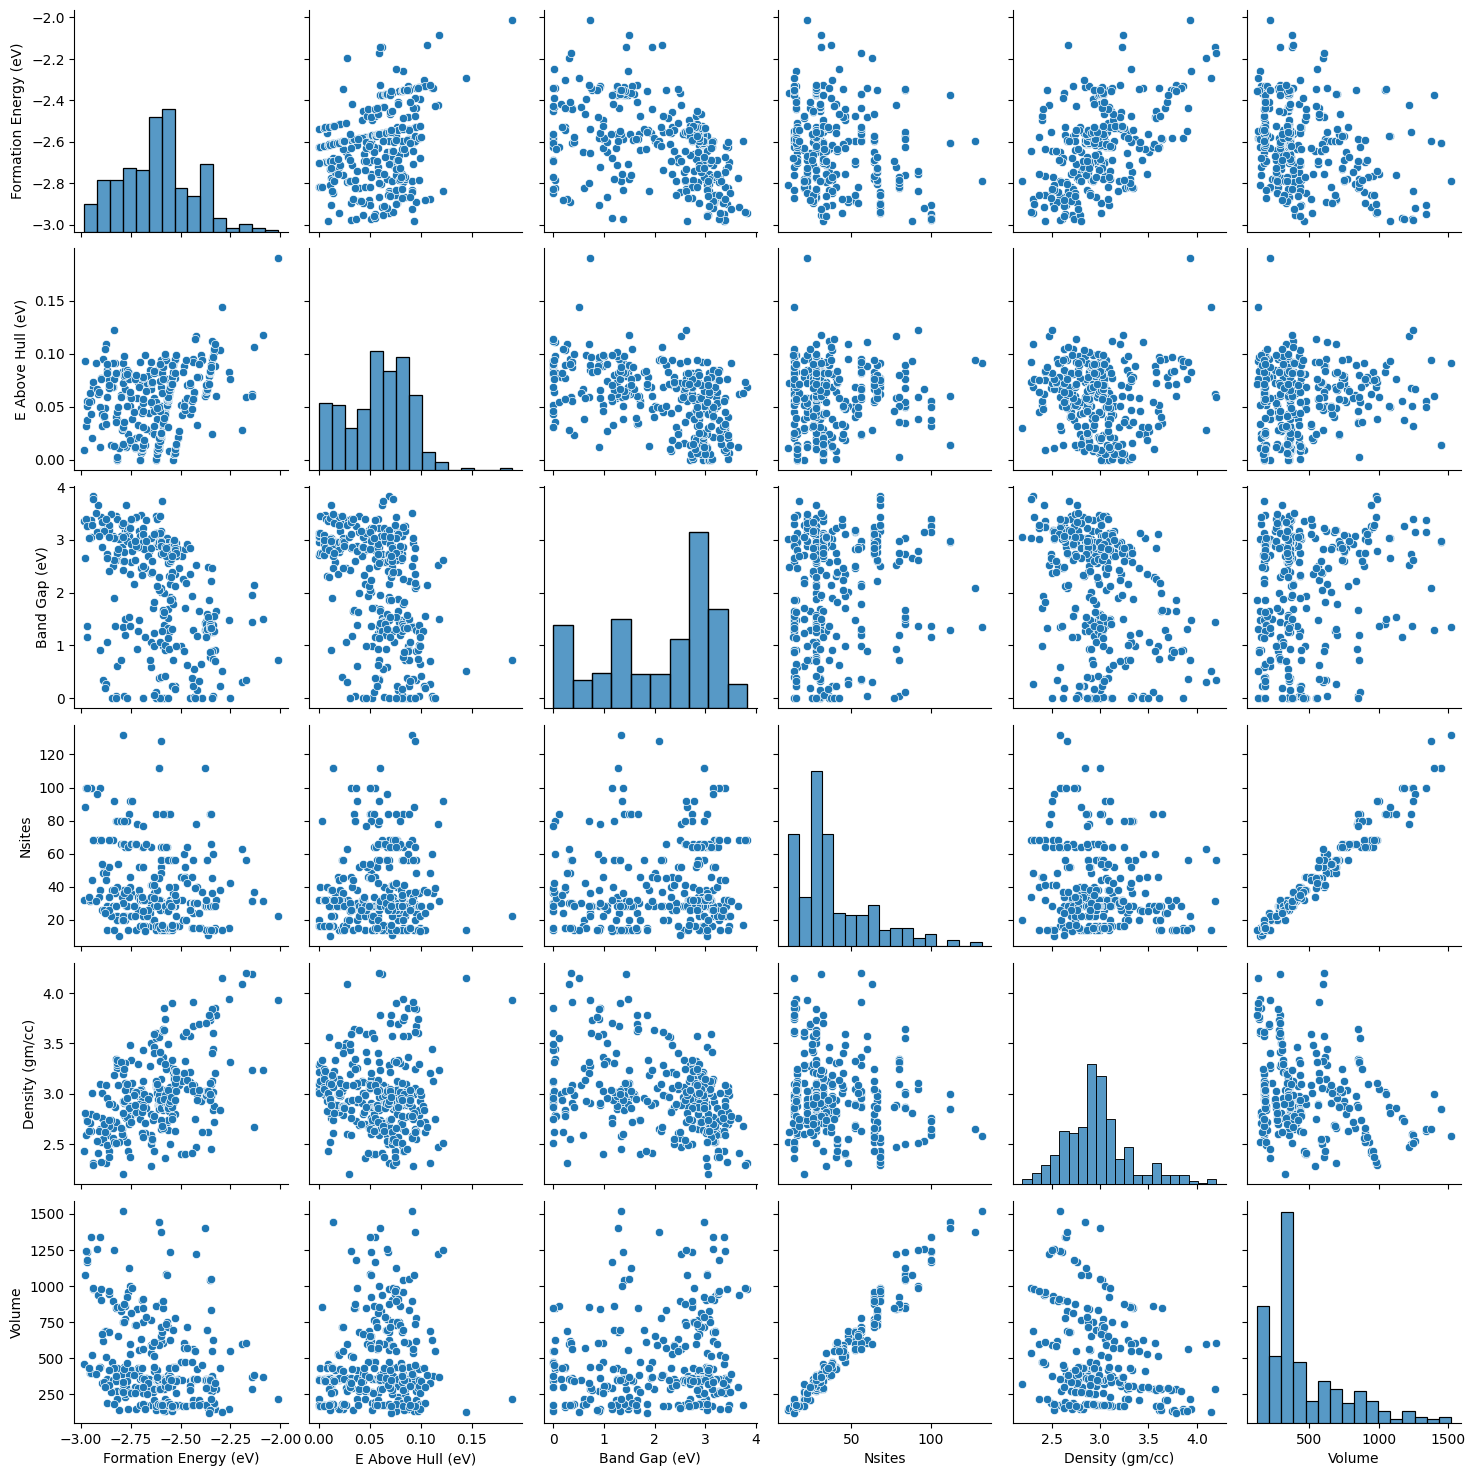

In [15]:
sns.pairplot(data[num_feat])

## **Question 2** **(15 points)**

**Part 1** (5 points)
Find the two **most** positively correlated(relevant) variables. Why do you think they are relevant?

__Answer__: nsites and volume are highly correlated (0.98). This makes sense as a larger number of sights (atoms) would indicate the system is larger and thus a higher volume would be seen. These variables are relevant as a new feature can be extracted from them. If we divide nsites by volume we can compare the average number of atoms per unit volume to the known crystal structures and predict the crystal structure

**Part 2** (5 points)
Find the two **least** correlated (cloasest to 0) variables. Why do you think they are **not** relevant?

__Answer__: Density and E Above Hull are the closest to zero. These do not seem to be relevant as density is a measure of mass per volume and E Above Hull is a measure of energy in eV. There does not seem to be a connection between these two

**Part 3** (5 points)
What about negative correlations?  Are there two variables that are very negatively correlated predictable from each other?

__Answer__: Yes, Formation Energy and Band Gap are moderatly inversely correlated.


In [ ]:
# PROVIDE ANY CODE NEEDED FOR QUESTION 2 HERE

Okay, now I know which variables are numerical and which are categorical. Since categorical ones bring ValueErrors, can we just use numerical ones? Let's give it a try.

In [ ]:
method = DecisionTreeClassifier()
model = method.fit(train[num_feat].to_numpy(),train['Crystal System'].to_numpy())

Great!!! The model was successfully fit！ 🙂 Now, we can evaluate the performance on test set.

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [ ]:
# get model predictions on test set
predicted_label=model.predict(test[num_feat].to_numpy())

# assign the true labels of the test set
groundtruth_label=test['Crystal System'].to_numpy()

# calculate accuracy score between the predictions and the true labels
accuracy=accuracy_score(predicted_label,groundtruth_label)

# calcumate precision scores between predictions and true labels
macro_precision=precision_score(predicted_label,groundtruth_label,average='macro')
micro_precision=precision_score(predicted_label,groundtruth_label,average='micro')

# calculate recall scores between the predictions and true labels
macro_recall=recall_score(predicted_label,groundtruth_label,average='macro')
micro_recall=recall_score(predicted_label,groundtruth_label,average='micro')

# calculate f1 scores between the predictions and true lables
macro_f1=f1_score(predicted_label,groundtruth_label,average='macro')
micro_f1=f1_score(predicted_label,groundtruth_label,average='micro')


# store all the results in a pretty table using the `tabulate` package.
from tabulate import tabulate

# give a list of lists, where each list will have a string of the metric name
# followed by the actual metric score we calculated
results = [
["accuracy", accuracy],
["macro_precision", macro_precision],
["micro_precision",micro_precision],
["macro_recall",macro_recall],
["micro_recall",micro_recall],
["macro_f1",macro_f1],
["micro_f1",micro_f1],
]
print (tabulate(results, headers=["Metrics", "Values"]))

Metrics            Values
---------------  --------
accuracy         0.514706
macro_precision  0.49531
micro_precision  0.514706
macro_recall     0.504843
micro_recall     0.514706
macro_f1         0.495699
micro_f1         0.514706


Ok, we already see things are interesting. There are several different metrics (accuracy, precision, recall, f1)! Hmmm....

Here is a great tutorial to help you out.

https://androidkt.com/micro-macro-averages-for-imbalance-multiclass-classification/#:~:text=Macro%20average%20deals%20with%20aggregates%20or%20totals%2C%20macro,price%20levels%2C%20and%20gross%20domestic%20product%20or%20GDP.

Part of this class is learning to be able to use outside resources to learn more about these topics.  Here is a chance to get some practice 😀

## **Question 3** **(10 points)**

**Part 1 (5 points)**

What do **original (binary)** accuracy, precision, recall and f1 mean? How are they counted?

__Answer__: PROVDE YOUR ANSWER HERE

**Part 2 (5 points)**  

What do **macro/micro** precision, recall and f1 mean? How are they counted? Why we use macro/micro metrics here instead of original binery ones?

__Answer__: PROVIDE YOUR ANSWER HERE


In [ ]:
# PROVIDE ANY CODE NEEDED FOR QUESTION 3 HERE

# Solution with Feature Engineering

![?](https://www.mememaker.net/static/images/memes/4751028.jpg)

Randy 🧙 wanna ask you a question since you dropped all the categorical variables. Are these variables really not useful for classification? Let's encode these variables to allow them to be fit into the model. Then, we can see if they can impact the performance of the task.

### Categorical encoding methods
<a id='Categorical_encoding_methods'></a>

#### 1. One Hot Encoding
- Method: Encode each category value into a binary vector, with size = # of distinct values. See https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63

- Example: `Has Bandstructure` column has 2 distinct values, True and False. Create a new column where 1 = True and 0 = False.

  &#43;&#43; Pros: simple and rugged method to get categorical features into unique and useful numerical features

  &#45;&#45; Cons: $m$ unique values results in $m$ unique new features. This is fine when there are only 2-3 unique values (such as hi/lo, yes/no), but creates issues when there are more. Can't handle new categories that weren't in training data, and easily overfit. Sparse data.

#### 2. Encode to ordinal variables
- Method: assign each unique value to a unique number.

- Example: `Spacegroup = Pc` is assigned to 0, `Spacegroup = P21/c` is assigned to 1, etc.

  &#43;&#43; Pros: simple and quick, 1 column in -> 1 column out

  &#45;&#45; Cons: residual "structure" (number assigned is arbitrary, and it leads algorithms to assume that a Spacegroup with a value of 20 is higher value than a Spacegroup of value 1)

#### 3. Feature Hashing
- Method: Encode each unique category into a non-binary vector

- Example: `Spacegroup = Pc` is assigned to [1,0,0], `Spacegroup = P21/c` is assigned to [1,2,-1], etc. Specify number of columns (length of vector)

 &#43;&#43; Pros: low dimensionality, so it is really efficient.

 &#45;&#45; Cons: potential collisions (for example the 1st value in example has both Spacegroups sharing a '1'); hashed features aren't interpretable so can't be used in feature importance. **How do you come up with hashes to preserve distances!?**

#### 4. Other methods
- Primarily involve prior knowledge about dataset. Encode with own algorithm to include closely related features.

- Variation on One Hot Encoding for large numbers of unique values: classify infrequent instances into "rare" category. May lose some granularity and important info, but also allows for new categories that aren't in training data

Now, let's explore categorical variables one by one.

In [ ]:
cat_feat

Index(['Materials Id', 'Formula', 'Spacegroup', 'Has Bandstructure',
       'Crystal System'],
      dtype='object')

### `'Materials Id'` column

In [ ]:
data['Materials Id'].describe()

count           339
unique          339
top       mp-849394
freq              1
Name: Materials Id, dtype: object

339 unique values for 339 unique entries; there is no useful information in this column and it can be dropped.

## **Question 4** **(5 points)**

Why can this column be dropped?  I.e., why is a column with all unique values (and no prior information) not useful?

__Answer__: PROVIDE YOUR ANSWER HERE



In [ ]:
data.drop(columns=['Materials Id'],inplace=True)
data.columns

Index(['Formula', 'Spacegroup', 'Formation Energy (eV)', 'E Above Hull (eV)',
       'Band Gap (eV)', 'Nsites', 'Density (gm/cc)', 'Volume',
       'Has Bandstructure', 'Crystal System'],
      dtype='object')

### `'Has Bandstructure'` column

<Axes: >

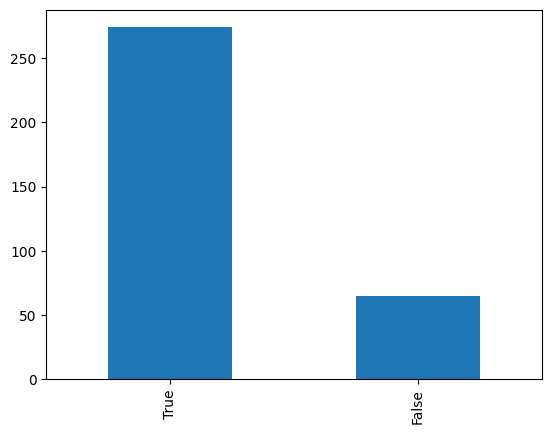

In [ ]:
data['Has Bandstructure'].value_counts().plot(kind='bar')

2 unique values, True and False. Classic example of when to use one-hot encoding

In [ ]:
# One-hot encode 'Has Bandstructure'
data['Has Bandstructure'] = data['Has Bandstructure'].map({True:1, False:0})

### `'Spacegroup'` column

44


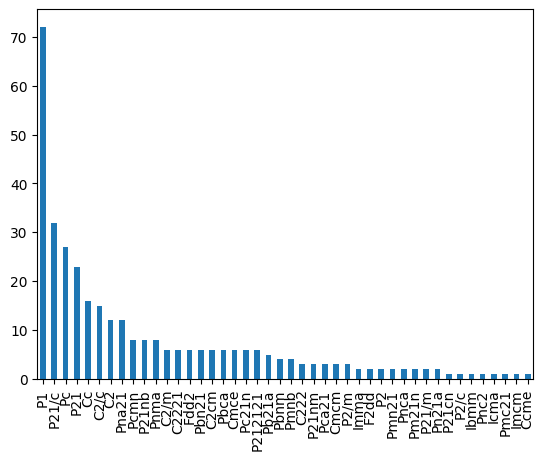

In [ ]:
data['Spacegroup'].value_counts().plot(kind='bar')
print(data['Spacegroup'].nunique())

44 unique values, with most of them occuring multiple times

**Option 1:** One-hot encoding will result in 44 new feature columns; inefficient and memory-intensive.

**Option 2:** Encode to ordinal numbers. Will possibly work, but does leave a residual structure that may affect model performance

**Option 3:** Use Feature Hashing to create a vector representation of each unique Spacegroup. Note that if vector size = 44, it's the same as one-hot encoding, and if vector size = 1, it's the same as encoding to ordinal variables. What other vector size might be useful?  3 or 4?

In [ ]:
# Option 1: One-hot encoding (not used)
pd.get_dummies(data['Spacegroup'])

,C2,C2/c,C2/m,C222,C2221,C2cm,Cc,Ccme,Cmce,Cmcm,...,Pcmn,Pm21n,Pmc21,Pmn21,Pmnb,Pn21a,Pna21,Pnc2,Pnca,Pnma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Option 2: Ordinal number encoding
data['Spacegroup (ordinal)'] = pd.factorize(data['Spacegroup'])[0]

# Can also order by most common to least common
data['Spacegroup'].rank(method="dense").astype(int)

0      32
1      22
2       7
3       2
4       2
       ..
334    17
335    17
336    17
337    17
338    17
Name: Spacegroup, Length: 339, dtype: int64

In [ ]:
# Option 3: Feature Hashing
from sklearn.feature_extraction import FeatureHasher
n = 3
fh = FeatureHasher(n_features=n, input_type='dict')

# must first convert our categorical column(s) to a list of dictionaries,
# where each dict has the form {column_name: value}, in the case of
# Spacegroup, it will be like: [{'Spacegroup': 'P1'}, {'Spacegroup': 'P21/C'}, ...]
data_to_hash = data['Spacegroup'].apply(lambda x: {'Spacegroup': x}).tolist()
hashed_tag = fh.transform(data_to_hash).toarray()
ht_df = pd.DataFrame(hashed_tag)
ht_df.columns = ['Spacegroup'+str(i) for i in range(n)]

try:
  data = data.join(ht_df)
except ValueError: # meaning this cell has already been run (for convenience)
  pass
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Formula                339 non-null    object 
 1   Spacegroup             339 non-null    object 
 2   Formation Energy (eV)  339 non-null    float64
 3   E Above Hull (eV)      339 non-null    float64
 4   Band Gap (eV)          339 non-null    float64
 5   Nsites                 339 non-null    int64  
 6   Density (gm/cc)        339 non-null    float64
 7   Volume                 339 non-null    float64
 8   Has Bandstructure      339 non-null    int64  
 9   Crystal System         339 non-null    object 
 10  Spacegroup (ordinal)   339 non-null    int64  
 11  Spacegroup0            339 non-null    float64
 12  Spacegroup1            339 non-null    float64
 13  Spacegroup2            339 non-null    float64
dtypes: float64(8), int64(3), object(3)
memory usage: 37.2+ KB


### `'Formula'` column

In [ ]:
data['Formula'].value_counts()

LiFeSiO4           42
LiCoSiO4           29
Li2FeSiO4          15
Li2CoSiO4          14
Li2MnSiO4          12
                   ..
Li3Co2Si3O10        1
Li10Co(SiO5)2       1
Li4Co2Si3O10        1
Li2FeSi4O11         1
Li5Co4(Si3O10)2     1
Name: Formula, Length: 114, dtype: int64

114 unique values, most only occuring once. One-hot encoding is out of the question

**Option 1,2,3:** one-hot encoding, ordinal number encoding, and feature hashing all become inefficient with such variety.

**Option 4:** Use domain knowledge to create additional features. For example, we can look at the LiFeSiO4 formula, and turn it into 4 new columns, each one indicating how many of each atom are in the formula (for example, {Li: 1, Fe: 1, Si: 1, O: 4})

 🧙  THIS MAKES RANDY HAPPY!

 ![face](https://wwwcache.wralsportsfan.com/asset/voices/2017/08/24/16902022/excited_baby-DMID1-5bvd6d0n1-480x293.gif)

In [ ]:
# Option 4: use chemparse package to create the new features of atom counts
import chemparse
chem_data = data['Formula'].apply(chemparse.parse_formula)

# Convert the dictionary into a dataframe and fill NaN's with zero's
chem_data = pd.json_normalize(chem_data)
chem_data = chem_data.fillna(0)

data = data.join(chem_data)

### `'Crystal System'` column
This is the target column, and there are 3 different types of crystal structures we're trying to classify. To properly transform this to numerical data, we have to understand if we are working on a _multi-class_ problem or a _multi-label_ problem.

- A multi-class problem is one in which there is only one distinct type of classification for each row. For example, a fruit is either an apple or an orange, but cannot be both. For a multi-class problem, the target value should be a single value, such as a 0 for apple and 1 for orange. In other words, it would be encoded to ordinal numbers.
- A multi-label problem is one in which there are possibly multiple labels for each row. For example, classifying pictures of apples and oranges can include a picture of an apple alone, an orange alone, or both an apple and an orange. For a multi-label problem, the target value should be a vector representation, such as [1,0] for apple, [0,1] for orange, and [1,1] for both apple and orange. In other words, we would have to one-hot encode the target feature.

Since the crystal system structure is unique, this is a multi-class problem. The target output should be encoded to a 0, 1, or 2. If it were a multi-label problem, the target output would have to be encoded to a vector of length 3.

<Axes: >

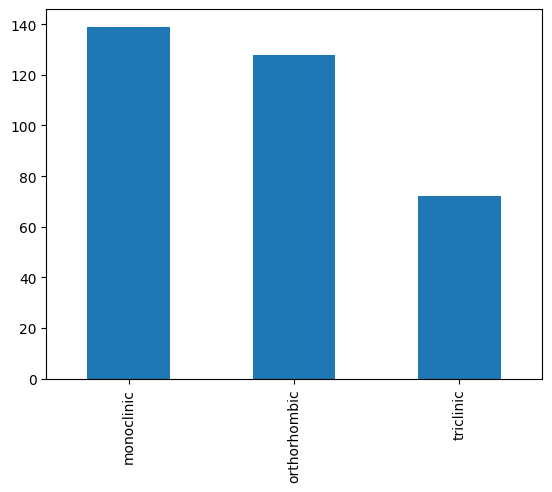

In [ ]:
# Check for balance
data['Crystal System'].value_counts().plot(kind='bar')

In [ ]:
# Encode Crystal System to ordinal values for multi-class problem
data['Crystal System (#)'] = data['Crystal System'].map({'monoclinic':0, 'orthorhombic':1, 'triclinic':2})

### Test performance

Let's test how well different collections of features performs on our test dataset. First, we will collect all of the original numeric features only. Second, we will include those categorical features that were encoded; `Has Bandstructure` as a binary 0/1 value, and `Spacegroup (ordinal)` that was encoded as ordinal values. Lastly, we'll change the `Spacegroup (ordinal)` encodings to be the feature hasing encodings (`Spacegroup0`,`Spacegroup1`,`Spacegroup2`), and we'll compare all three collections of features to see which is the best performing.

In [ ]:
# All new numerical features (Crystal System excluded, since it's int32)
features = list(data.select_dtypes(include=['int64','float64']).columns.values)

# All the numeric features and ordinally encoded categorical features
ord_feat = ['Formation Energy (eV)','E Above Hull (eV)','Band Gap (eV)',
            'Nsites','Density (gm/cc)','Volume','Has Bandstructure',
            'Spacegroup (ordinal)','Li','Mn','Si','O','Fe','Co'
           ]

# All the numeric features and feature hashed Spacegroup feature
hash_feat = ['Formation Energy (eV)','E Above Hull (eV)','Band Gap (eV)',
             'Nsites','Density (gm/cc)','Volume','Has Bandstructure',
             'Spacegroup0','Spacegroup1','Spacegroup2',
             'Li','Mn','Si','O','Fe','Co'
            ]

labels = ['Crystal System (#)']

In [ ]:

# Make titles for our tabulate results container
titles = ['Original Numerical Features Only',
          'With Encoded Features\n(Ordinal Spacegroup)',
          'With Encoded Features\n(Hashed Spacegroup)'
         ]

results=[]

# loop over each list of features, filter our `data` dataframe
# to include only those columns, split the filtered data into train and test,
# and calculate the metrics we want
for i, feat in enumerate([num_feat,ord_feat,hash_feat]):
    X = data[feat]
    y = data[labels]

    # 80% training data and 20% testing
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=1)
    dtree = DecisionTreeClassifier()
    dtree.fit(Xtrain,ytrain)
    yp = dtree.predict(Xtest)

    accuracy=accuracy_score(yp,ytest)

    macro_precision=precision_score(yp,ytest,average='macro')
    micro_precision=precision_score(yp,ytest,average='micro')

    macro_recall=recall_score(yp,ytest,average='macro')
    micro_recall=recall_score(yp,ytest,average='micro')

    macro_f1=f1_score(yp,ytest,average='macro')
    micro_f1=f1_score(yp,ytest,average='micro')

    results.append([titles[i],accuracy,macro_precision,micro_precision,macro_recall,micro_recall,macro_f1,micro_f1])


In [ ]:
print (tabulate(results, headers=["features", "accuracy", "macro_precision", "micro_precision", "macro_recall", "micro_recall", "macro_f1", "micro_f1"],tablefmt="grid"))

+----------------------------------+------------+-------------------+-------------------+----------------+----------------+------------+------------+
| features                         |   accuracy |   macro_precision |   micro_precision |   macro_recall |   micro_recall |   macro_f1 |   micro_f1 |
+==================================+============+===================+===================+================+================+============+============+
| Original Numerical Features Only |   0.529412 |          0.513829 |          0.529412 |       0.522917 |       0.529412 |   0.51662  |   0.529412 |
+----------------------------------+------------+-------------------+-------------------+----------------+----------------+------------+------------+
| With Encoded Features            |   1        |          1        |          1        |       1        |       1        |   1        |   1        |
| (Ordinal Spacegroup)             |            |                   |                   |           

Want to check the accuracy of each class? We can use the confusion matrix to show the results.

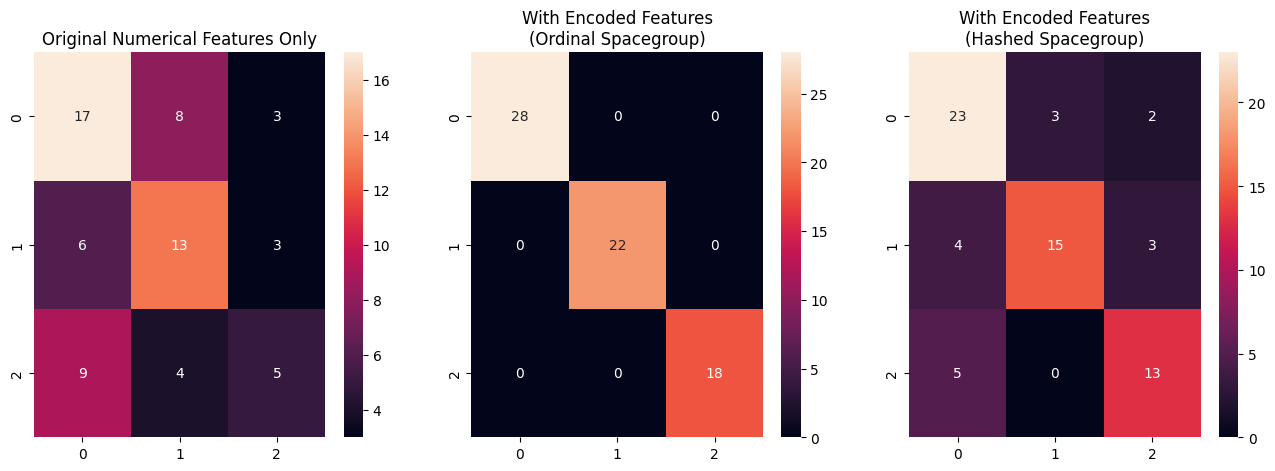

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,5))

titles = ['Original Numerical Features Only',
          'With Encoded Features\n(Ordinal Spacegroup)',
          'With Encoded Features\n(Hashed Spacegroup)'
         ]

results=[]

for i, feat in enumerate([num_feat,ord_feat,hash_feat]):
    X = data[feat]
    y = data[labels]

    # 80% training data and 20% testing
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=1)
    dtree = DecisionTreeClassifier()
    dtree.fit(Xtrain,ytrain)
    yp = dtree.predict(Xtest)

    plt.subplot(1,3,i+1)
    cm = confusion_matrix(ytest,yp)
    sns.heatmap(cm,annot=True)
    plt.title(titles[i])

## **Question 5** **(10 points)**

Based on the above metrics table and confusion matrix, which feature engineering technique performs best and why?

__Answer__: PROVIDE YOUR ANSWER HERE




## **Question 6** **(15 points)**
Try two different methods such as `linear_model.LogisticRegression`, `neighbors.KNeighborsClassifier` or `ensemble.RandomForestClassifier`. Report your results.
Can you achieve better performance than any of the previous models? Why do these methods perform better/worse than the decision tree?

__Answer__: PROVIDE YOUR OBSERVATIONS HERE





In [ ]:
'''
Hint:
from sklearn.linear_model import LogisticRegression
for i, feat in enumerate([num_feat,ord_feat,hash_feat]):
    X = data[feat]
    y = data[labels]
    #80% training data and 20% testing
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=1)

    # change to your selected model
    model = LogisticRegression(max_iter=10000)


    model.fit(Xtrain,ytrain)
    yp = model.predict(Xtest)
'''

'\nHint:\nfrom sklearn.linear_model import LogisticRegression\nfor i, feat in enumerate([num_feat,ord_feat,hash_feat]):\n    X = data[feat]\n    y = data[labels]\n    #80% training data and 20% testing\n    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=1)\n\n    # change to your selected model\n    model = LogisticRegression(max_iter=10000)\n\n\n    model.fit(Xtrain,ytrain)\n    yp = model.predict(Xtest)\n'

In [ ]:
# Your code here
# Your code here
# Your code here
# Your code here
# Your code here
# Your code here
# Your code here

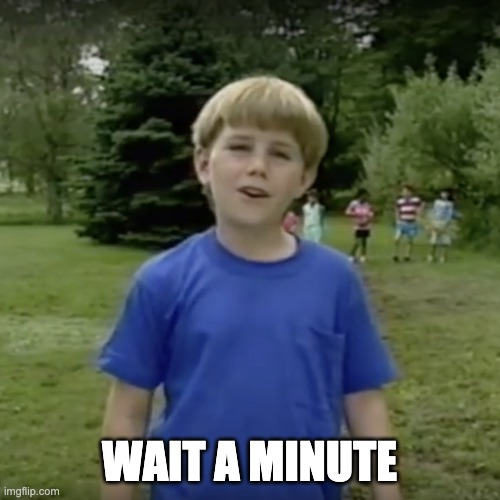



## Let's take a step back...

Notice that with both the `DecisionTreeClassifier` from Question 5 and your models from Question 6, the collection of features with `Spacegroup (ordinal)` has perfect accuracy. **This should set off alarm bells!!!**. Very rarely do we ever get perfect predicting models; this is usually a sign that something is suspicious with our procedure.

Let's do a simple check: perform the classification task with the `DecisionTreeClassifier` with only the `Spacegroup (ordinal)` features, (no numerical features, the input will only have one column)

Text(0.5, 1.0, "DecisionTreeClassifier on 'Spacegroup (ordinal)' feature")

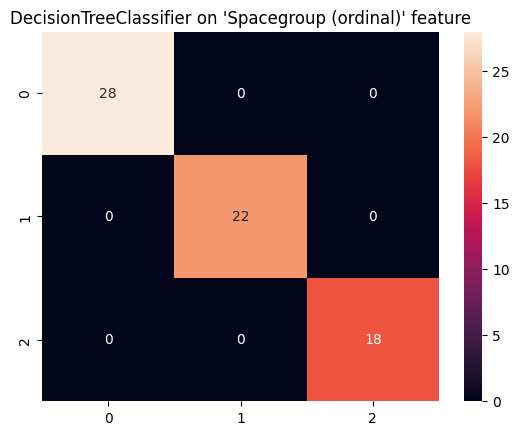

In [ ]:
feature = ['Spacegroup (ordinal)']
labels =  ['Crystal System (#)']

X = data[feature]
y = data[labels]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=1)
dtree = DecisionTreeClassifier()
dtree.fit(Xtrain,ytrain)
yp = dtree.predict(Xtest)

cm = confusion_matrix(ytest,yp)
sns.heatmap(cm,annot=True)
plt.title(f"DecisionTreeClassifier on '{feature[0]}' feature")




As we can see, it seems that only the `Spacegroup (ordinal)` feature is needed to perfectly predict `Crystal System (#)`!!! This is an example of a phenomenon called __Target Leakage__. The is characterized by having a column in your input dataset that is a proxy for your target variable, or in other words, it contains essentially the same information as your target variable.

To better illustrate the concept, consider the following basic example:
 - Suppose we have a dataset that contains information about hospital patients' status. Our first rows of our hypothetical dataframe might look something like the following:

| **got_sinus_infection** | **sex** | **weight** | **took_anti_biotic** |
|---------------------|--------|---------|------------------|
| True                | Male   | 200     | True             |
| False               | Female | 135     | False            |
| False               | Male   | 173     | False            |

- If we are interested in predicting `got_sinus_infection`, then we do not need to record any information about the `sex`, `weight`, or any candidate feature because we already have a proxy variable in `took_anti_biotic`; most individuals who have a sinus infection take anti biotics to treat their sinus infection, so we only need to know this information to predict the sinus infection status.  

Hence, considering our Lithium Ion battery setting, we would not need to run experiments and collect various features like those in the dataset to predict `Crystal System (#)` because you already have information about the `Spacegroup` that already contains the same information! We just so happened to encode that feature in such a manner that the perfect relationship with `Crystal System (#)` was brought about.

Therefore, when designing a machine learning project, one must carefully consider which features are applicable to the prediction task. For a feature you are considering including in your input dataset, consider if that feature is redundant or is already indicative of your target feature in the first place.



# Solution with Feature Engineering + rebalance dataset

![](https://media.makeameme.org/created/today-rebalance.jpg)

Let's review the distribution of `Crystal System` again. It is clear that the three class is unbalanced. Dealing with imbalanced data is common in classification problems because such imbalance usually affects the performance of the model.

<Axes: >

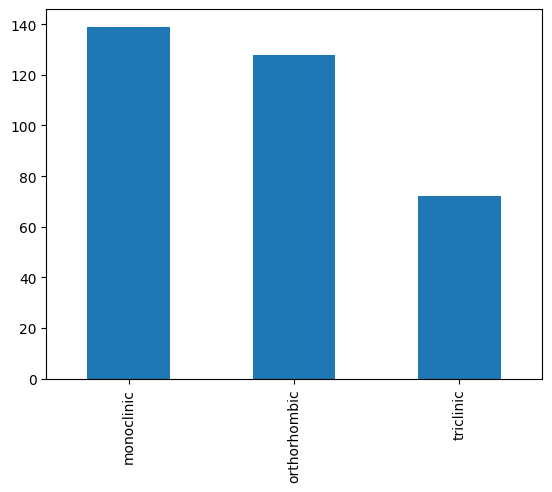

In [ ]:
# Check for balance
data['Crystal System'].value_counts().plot(kind='bar')

Here, we use apply undersampling to `monoclinic` and `orthorhombic` so that they have the same number as `triclinic`.

In [ ]:
monoclinic_data=data[data['Crystal System'] == 'monoclinic']
orthorhombic_data=data[data['Crystal System'] == 'orthorhombic']
triclinic_data=data[data['Crystal System'] == 'triclinic']

monoclinic_data_sampled = monoclinic_data.sample(n=len(triclinic_data))
orthorhombic_data_sampled = orthorhombic_data.sample(n=len(triclinic_data))

data_rebalanced=triclinic_data.append(monoclinic_data_sampled).append(orthorhombic_data_sampled).reset_index(drop=True)

<ipython-input-42-aba936bbf604>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_rebalanced=triclinic_data.append(monoclinic_data_sampled).append(orthorhombic_data_sampled).reset_index(drop=True)
<ipython-input-42-aba936bbf604>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_rebalanced=triclinic_data.append(monoclinic_data_sampled).append(orthorhombic_data_sampled).reset_index(drop=True)


<Axes: >

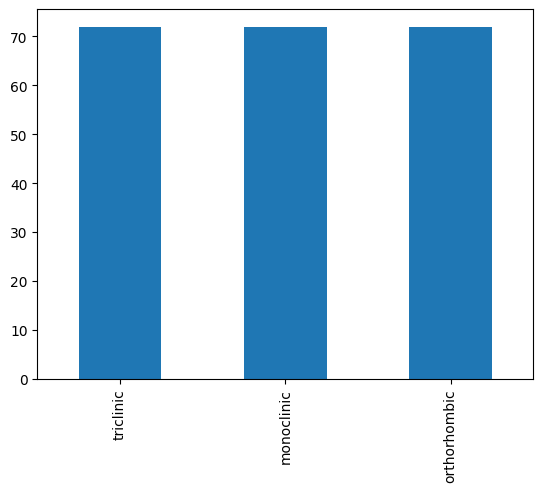

In [ ]:
# Check for balance
data_rebalanced['Crystal System'].value_counts().plot(kind='bar')

Now that the dataset has been rebalanced, let's see if this affects the performance of the model.

## **Question 7** **(15 points)**
Redo the calculations, using the above `data_rebalanced` dataset. Report results and compare the results with the original(imbalance) dataset. Will rebalancing the data improve performance? Why?

__Answer__: PROVIDE YOUR RESULTS AND OBSERVATIONS HERE





In [ ]:
'''
Hint:

for i, feat in enumerate([num_feat,ord_feat,hash_feat]):

    # change to rebalanced dataset: data_rebalanced
    X = data_rebalanced[feat]
    y = data_rebalanced[labels]


    # 80% training data and 20% testing
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=1)
    dtree = DecisionTreeClassifier()
    dtree.fit(Xtrain,ytrain)
    yp = dtree.predict(Xtest)

'''

'\nHint:\n\nfor i, feat in enumerate([num_feat,ord_feat,hash_feat]):\n\n    # change to rebalanced dataset: data_rebalanced\n    X = data_rebalanced[feat]\n    y = data_rebalanced[labels]\n\n\n    # 80% training data and 20% testing\n    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=1)\n    dtree = DecisionTreeClassifier()\n    dtree.fit(Xtrain,ytrain)\n    yp = dtree.predict(Xtest)\n\n'

In [ ]:
# Your code here
# Your code here
# Your code here
# Your code here
# Your code here
# Your code here
# Your code here

# Solution with Feature Engineering + dimensionality reduction

![](https://i.ytimg.com/vi/hSDinYYObd4/maxresdefault.jpg)

Remember the mysterious technology Principal Component Analysis (PCA) that Randy 🧙 mentioned the lecture? Forgotten? Go review it, because it may appear on your midterm/final exam. 👀

Now, let's see how PCA works in the classification task.
PCA performs better with a normalized feature set. We will perform standard scalar normalization to normalize our feature set first using `StandardScaler` and then apply `PCA`.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

+----------------------------------+------------+-------------------+-------------------+----------------+----------------+------------+------------+
| features                         |   accuracy |   macro_precision |   micro_precision |   macro_recall |   micro_recall |   macro_f1 |   micro_f1 |
+==================================+============+===================+===================+================+================+============+============+
| Original Numerical Features Only |   0.558824 |          0.580688 |          0.558824 |       0.559947 |       0.558824 |   0.566231 |   0.558824 |
+----------------------------------+------------+-------------------+-------------------+----------------+----------------+------------+------------+
| With Encoded Features            |   0.5      |          0.506614 |          0.5      |       0.509074 |       0.5      |   0.506347 |   0.5      |
| (Hashed Spacegroup)              |            |                   |                   |           

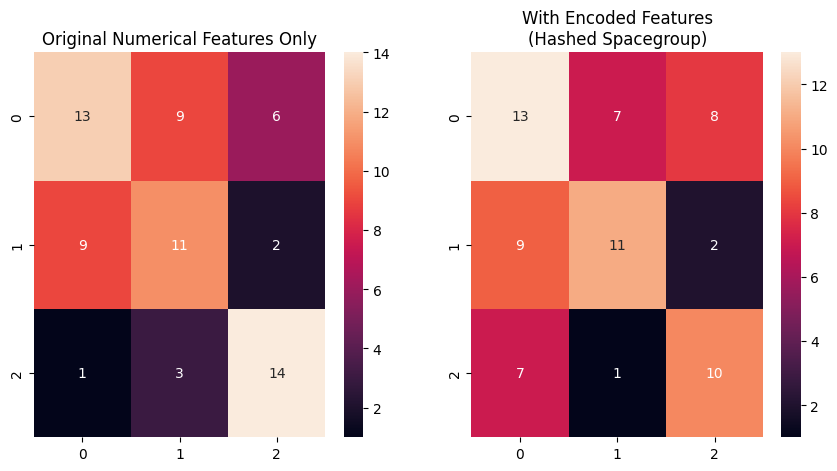

In [ ]:
plt.figure(figsize=(16,5))

titles = ['Original Numerical Features Only',
          'With Encoded Features\n(Hashed Spacegroup)'
         ]

results=[]

for i, feat in enumerate([num_feat,hash_feat]):
    X = data[feat]
    y = data[labels]

    #
    sc = StandardScaler()
    pca = PCA(n_components=4)  # adjust the number of principal component here
    X = sc.fit_transform(X)
    X = pca.fit_transform(X)


    # 80% training data and 20% testing
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=1)
    dtree = DecisionTreeClassifier()
    dtree.fit(Xtrain,ytrain)
    yp = dtree.predict(Xtest)

    accuracy=accuracy_score(yp,ytest)

    macro_precision=precision_score(yp,ytest,average='macro')
    micro_precision=precision_score(yp,ytest,average='micro')

    macro_recall=recall_score(yp,ytest,average='macro')
    micro_recall=recall_score(yp,ytest,average='micro')

    macro_f1=f1_score(yp,ytest,average='macro')
    micro_f1=f1_score(yp,ytest,average='micro')

    results.append([titles[i],accuracy,macro_precision,micro_precision,macro_recall,micro_recall,macro_f1,micro_f1])

    plt.subplot(1,3,i+1)
    cm = confusion_matrix(ytest,yp)
    sns.heatmap(cm,annot=True)
    plt.title(titles[i])

print (tabulate(results, headers=["features", "accuracy", "macro_precision", "micro_precision", "macro_recall", "micro_recall", "macro_f1", "micro_f1"],tablefmt="grid"))

## **Question 8** **(15 points)**

**Part 1 (5 points)**

How does PCA perform dimensionality reduction? Is it valid for numerical variable? Why? Is it valid for ordinal variable? Why? Is it valid for categorical variable? Why?

__Answer__: PROVIDE YOUR ANSWER HERE

**Part 2 (10 points)**

Try different number of principal components (eg. `n_components=1,2,3,4`) on different methods (eg. `LogisticRegression`, `KNeighborsClassifier` or `naive_bayes` ), and report the results. Does PCA help seem to help some models more than others?

Does the classification effect increase as the number of principal components increases? Why?

__Answer__: PROVIDE YOUR OBSERVATIONS HERE


In [ ]:
# Your code here
# Your code here
# Your code here
# Your code here
# Your code here
# Your code here
# Your code here

## **Question 9** **($\infty$ points, since this is where you really learn stuff! :-)**

You can get as many points of extra credit as you like by doing a good job with this question!

Play around with doing a better analysis.  Things to try:

1.   This problem is easier that Case Study 1 in that you seem to have enough data to do a good job.  Can you make the problem harder and still do well?  E.g., if you make your training data smaller and smaller then is there some limit where you don't do well anymore?  This tells you how many experiments you need!
2.   Try different train and test splits and see if the answer changes (i.e.,
```
train_processed,test_processed = train_test_split(ds, test_size=0.2, shuffle=True, random_state=1234)
```
3.   Try different dimensionality reduction methods (other than PCA). Here are several examples in Sci-kit learn (https://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html?highlight=manifold%20learning). Do any work better than others?

